In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Data Import

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
print(train_df.shape)
print(test_df.shape)

(10000, 12)
(2500, 11)


In [4]:
train_df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [5]:
test_df.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


## EDA

In [6]:
print ("Rows     : " ,train_df.shape[0])
print ("Columns  : " ,train_df.shape[1])
print ("\nFeatures : \n" ,train_df.columns.tolist())
print ("\nMissing values :  ", train_df.isnull().sum().values)
print ("\nUnique values :  \n",train_df.nunique())

Rows     :  10000
Columns  :  12

Features : 
 ['Severity', 'Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation', 'Violations', 'Adverse_Weather_Metric', 'Accident_ID']

Missing values :   [0 0 0 0 0 0 0 0 0 0 0 0]

Unique values :  
 Severity                       4
Safety_Score                1175
Days_Since_Inspection         23
Total_Safety_Complaints       44
Control_Metric               952
Turbulence_In_gforces       1117
Cabin_Temperature            950
Accident_Type_Code             7
Max_Elevation               4191
Violations                     6
Adverse_Weather_Metric      4258
Accident_ID                10000
dtype: int64


In [7]:
print ("Rows     : " ,test_df.shape[0])
print ("Columns  : " ,test_df.shape[1])
print ("\nFeatures : \n" ,test_df.columns.tolist())
print ("\nMissing values :  ", test_df.isnull().sum().values)
print ("\nUnique values :  \n",test_df.nunique())

Rows     :  2500
Columns  :  11

Features : 
 ['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation', 'Violations', 'Adverse_Weather_Metric', 'Accident_ID']

Missing values :   [0 0 0 0 0 0 0 0 0 0 0]

Unique values :  
 Safety_Score                910
Days_Since_Inspection        23
Total_Safety_Complaints      42
Control_Metric              772
Turbulence_In_gforces       873
Cabin_Temperature           764
Accident_Type_Code            7
Max_Elevation              1922
Violations                    6
Adverse_Weather_Metric     1958
Accident_ID                2500
dtype: int64


### Univariate Analysis

In [8]:
id_col = ['Accident_ID']
target_col = ['Severity']
cat_col = ['Violations', 'Accident_Type_Code']
num_col = [i for i in train_df.columns if i not in id_col + target_col + cat_col] 
train_df[num_col].describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Adverse_Weather_Metric
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,32001.803282,0.255635
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,9431.995196,0.381128
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,831.695553,0.000316
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,25757.636908,0.012063
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,32060.336419,0.074467
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,38380.641513,0.354059
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,64297.651218,2.365378


In [9]:
test_df[num_col].describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Adverse_Weather_Metric
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,41.825224,12.946400,6.574800,65.368058,0.376197,79.993068,32383.134179,0.250886
std,16.280187,3.523364,7.179542,11.442005,0.116960,2.713833,9485.096436,0.387663
min,0.000000,1.000000,0.000000,20.966272,0.143376,74.740000,831.695553,0.000368
25%,30.593607,11.000000,1.000000,57.702826,0.292583,77.930000,26008.851717,0.013136
50%,41.461187,13.000000,4.000000,66.066545,0.357404,79.600000,32472.865497,0.072466
75%,52.751142,15.000000,9.000000,73.119872,0.441699,81.530000,38759.519071,0.315407
max,100.000000,23.000000,54.000000,97.994531,0.881926,94.200000,62315.408444,2.365378


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


#### Target

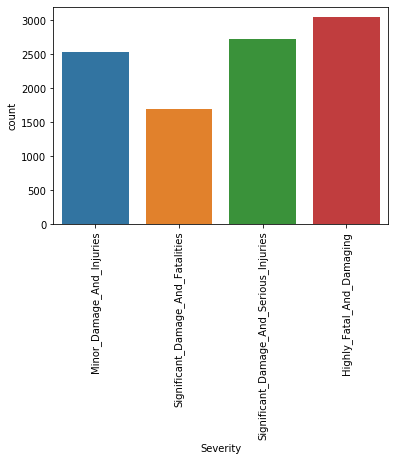

In [11]:
plt.figure()
plt.xticks(rotation = 90)
sns.countplot(train_df['Severity'])

## Bivariate Analysis

#### Numerical Features

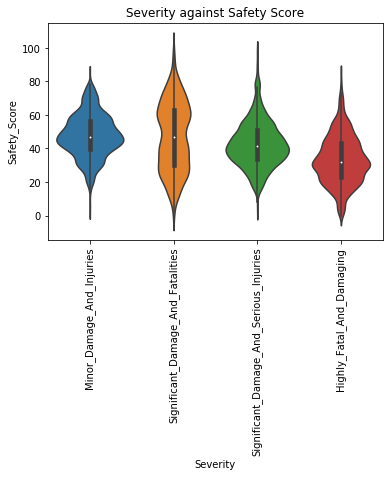

In [12]:
plt.figure()
plt.xticks(rotation=90)
plt.title('Severity against Safety Score')
sns.violinplot(y = train_df['Safety_Score'], x = train_df['Severity'])

In [13]:
#Ignoring Significant Damage and Fatalities Class as it isn't normally distributed

sample1 = train_df.loc[train_df['Severity'] == 'Minor_Damage_And_Injuries']['Safety_Score'].values.tolist()
#sample2 = train_df.loc[train_df['Severity'] == 'Significant_Damage_And_Fatalities']['Safety_Score'].values.tolist()
sample3 = train_df.loc[train_df['Severity'] == 'Significant_Damage_And_Serious_Injuries']['Safety_Score'].values.tolist()
sample4 = train_df.loc[train_df['Severity'] == 'Highly_Fatal_And_Damaging']['Safety_Score'].values.tolist()

statistics, pval = stats.f_oneway(sample1,sample3,sample4)
pval

4e-323

In [14]:
#mc = MultiComparison(train_df['Severity'], train_df['Max_Elevation'])
tukey_result = pairwise_tukeyhsd(train_df['Safety_Score'], train_df['Severity'],alpha=0.05)

print(tukey_result)

                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
              group1                               group2                 meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------------------
        Highly_Fatal_And_Damaging               Minor_Damage_And_Injuries  14.4467  0.001 13.4106 15.4828   True
        Highly_Fatal_And_Damaging       Significant_Damage_And_Fatalities  13.7485  0.001 12.5816 14.9154   True
        Highly_Fatal_And_Damaging Significant_Damage_And_Serious_Injuries   9.3138  0.001  8.2989 10.3288   True
        Minor_Damage_And_Injuries       Significant_Damage_And_Fatalities  -0.6982 0.4489 -1.9074   0.511  False
        Minor_Damage_And_Injuries Significant_Damage_And_Serious_Injuries  -5.1329  0.001 -6.1962 -4.0696   True
Significant_Damage_And_Fatalities Significant_Damage_And_Serious_Injuries  -4.4347  0.001 -5.625

> Safety score affects Highly Fatal Category <br><br>




#### Features: Days Since Inspection, Total Safety Complaints

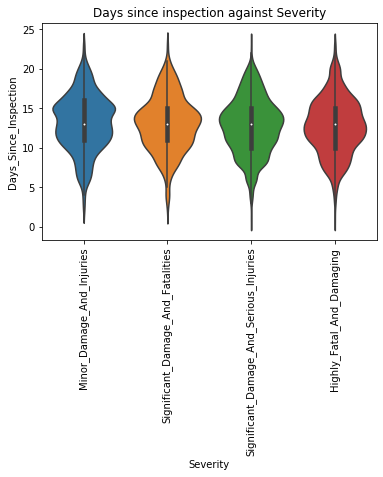

In [15]:
plt.figure()
plt.xticks(rotation=90)
plt.title('Days since inspection against Severity')
sns.violinplot(y = train_df['Days_Since_Inspection'], x = train_df['Severity'])

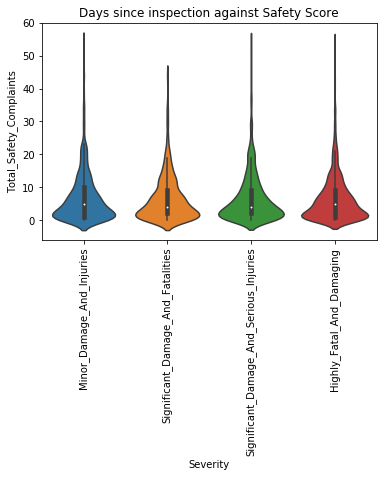

In [16]:
plt.figure()
plt.xticks(rotation=90)
plt.title('Days since inspection against Safety Score')
sns.violinplot(y = train_df['Total_Safety_Complaints'], x = train_df['Severity'])

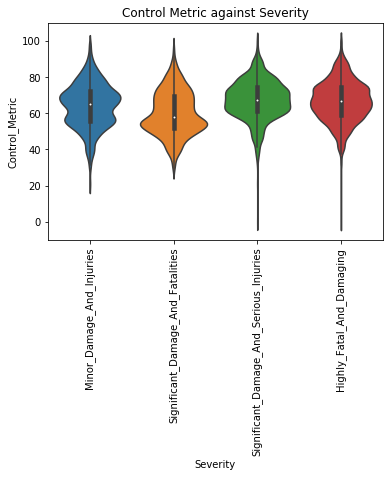

In [17]:
plt.figure()
plt.xticks(rotation=90)
plt.title('Control Metric against Severity')
sns.violinplot(y = train_df['Control_Metric'], x = train_df['Severity'])

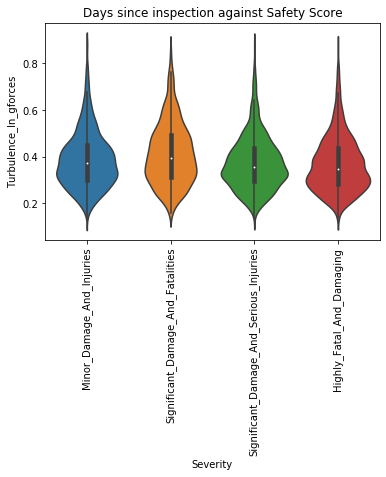

In [18]:
plt.figure()
plt.xticks(rotation=90)
plt.title('Days since inspection against Safety Score')
sns.violinplot(y = train_df['Turbulence_In_gforces'], x = train_df['Severity'])

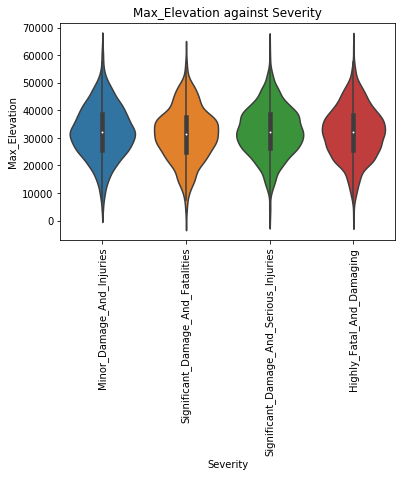

In [19]:
plt.figure()
plt.xticks(rotation=90)
plt.title('Max_Elevation against Severity')
sns.violinplot(y = train_df['Max_Elevation'], x = train_df['Severity'])

In [20]:
sample1 = train_df.loc[train_df['Severity'] == 'Minor_Damage_And_Injuries']['Max_Elevation'].values.tolist()
sample2 = train_df.loc[train_df['Severity'] == 'Significant_Damage_And_Fatalities']['Max_Elevation'].values.tolist()
sample3 = train_df.loc[train_df['Severity'] == 'Significant_Damage_And_Serious_Injuries']['Max_Elevation'].values.tolist()
sample4 = train_df.loc[train_df['Severity'] == 'Highly_Fatal_And_Damaging']['Max_Elevation'].values.tolist()
statistics, pval = stats.f_oneway(sample1,sample2,sample3,sample4)
pval

0.0034562119630822726

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

#mc = MultiComparison(train_df['Severity'], train_df['Max_Elevation'])
tukey_result = pairwise_tukeyhsd(train_df['Max_Elevation'], train_df['Severity'],alpha=0.05)

print(tukey_result)

                                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                                  
              group1                               group2                  meandiff p-adj    lower      upper   reject
----------------------------------------------------------------------------------------------------------------------
        Highly_Fatal_And_Damaging               Minor_Damage_And_Injuries  285.4229 0.6534  -366.1953  937.0411  False
        Highly_Fatal_And_Damaging       Significant_Damage_And_Fatalities -639.3563 0.1131  -1373.231   94.5184  False
        Highly_Fatal_And_Damaging Significant_Damage_And_Serious_Injuries  358.7482 0.4727  -279.5468  997.0432  False
        Minor_Damage_And_Injuries       Significant_Damage_And_Fatalities -924.7792 0.0097 -1685.2539 -164.3044   True
        Minor_Damage_And_Injuries Significant_Damage_And_Serious_Injuries   73.3253    0.9  -595.3826  742.0332  False
Significant_Damage_And_Fatalities Significant_Da

.

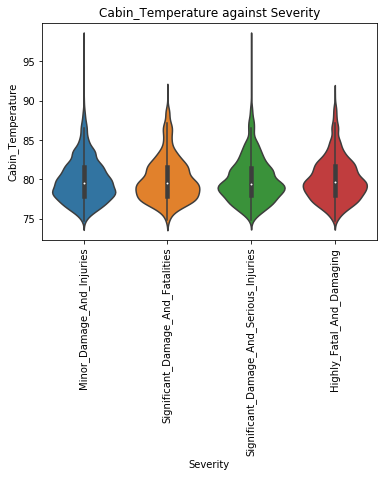

In [22]:
plt.figure()
plt.xticks(rotation=90)
plt.title('Cabin_Temperature against Severity')
sns.violinplot(y = train_df['Cabin_Temperature'], x = train_df['Severity'])

### Categorical Features

There are only 2 categorical features - "Violations" and "Accident_Type_Code"</br> 
Their dependence on the target will be examined

#### Categorical Feature #1: Violations

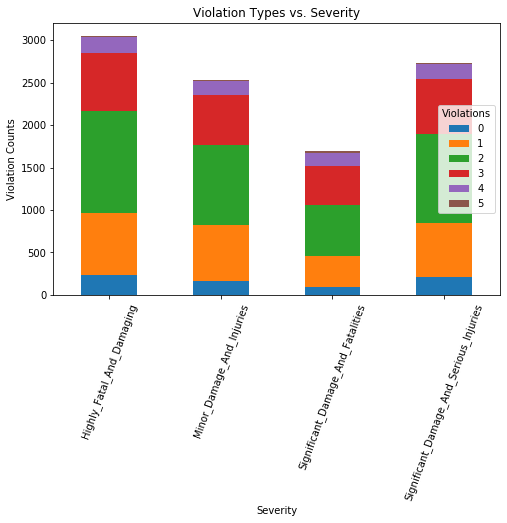

In [25]:
ctab = pd.crosstab(train_df['Severity'], train_df['Violations'])
severity = list(ctab.index.values)


ctab.plot.bar(stacked = True, figsize = (8,5), rot = 70)
plt.xlabel('Severity')
plt.ylabel('Violation Counts')
plt.title('Violation Types vs. Severity')
plt.show()

In [28]:
alpha = 0.05
ctab = pd.crosstab(train_df['Violations'], train_df['Severity'])
Csquare, pval, dof, freq = stats.chi2_contingency(ctab)

if(pval<alpha):
    print('Conclusion: We reject chi-square Null hypothesis. Violations and Severity are dependent')

Conclusion: We reject chi-square Null hypothesis. Violations and Severity are dependent


#### Categorical Feature #2: Accident Type Code

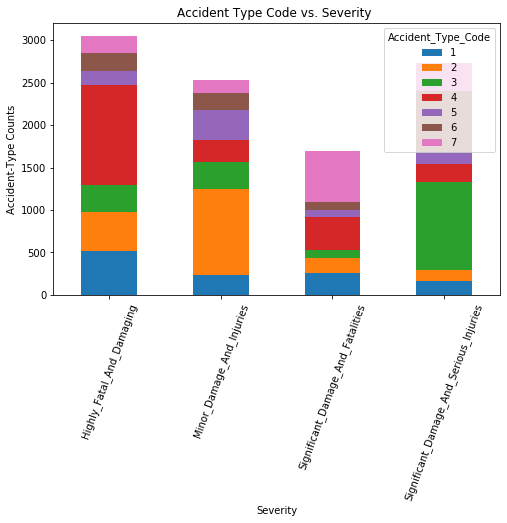

In [26]:
ctab = pd.crosstab(train_df['Severity'], train_df['Accident_Type_Code'])
severity = list(ctab.index.values)


ctab.plot.bar(stacked = True, figsize = (8,5), rot = 70)
plt.xlabel('Severity')
plt.ylabel('Accident-Type Counts')
plt.title('Accident Type Code vs. Severity ')
plt.show()

In [27]:
alpha = 0.05
ctab = pd.crosstab(train_df['Severity'], train_df['Accident_Type_Code'])
Csquare, pval, dof, freq = stats.chi2_contingency(ctab)

if(pval<alpha):
    print('Conclusion: We reject chi-square Null hypothesis. Accident_Type_Code and Severity are dependent')

Conclusion: We reject chi-square Null hypothesis. Accident_Type_Code and Severity are dependent


## New Features

In [29]:
train_df['ftr1'] = train_df['Safety_Score'] / train_df['Days_Since_Inspection']
test_df['ftr1'] = test_df['Safety_Score'] / test_df['Days_Since_Inspection']

In [30]:
train_df['ftr2'] = train_df['Control_Metric'] / (train_df ['Violations'] + 1)
test_df['ftr2'] = test_df['Control_Metric'] / (test_df['Violations'] + 1)

In [31]:
train_df['ftr3'] = train_df['Adverse_Weather_Metric'] * train_df['Cabin_Temperature'] * train_df['Turbulence_In_gforces']
test_df['ftr3'] = test_df['Adverse_Weather_Metric'] * test_df['Cabin_Temperature'] * test_df['Turbulence_In_gforces']

In [32]:
def bin_days(val):
    if (val <= 6) :
        return '0'
    elif((val > 6) & (val <= 12)):
        return '1'
    elif((val > 12) & (val <= 18)):
        return '2'
    elif(val > 18):
        return '3'

train_df['DSI_Segmented'] = train_df['Days_Since_Inspection'].apply(lambda row: bin_days(row))
test_df['DSI_Segmented'] = test_df['Days_Since_Inspection'].apply(lambda row: bin_days(row))

In [33]:
synth_cols = ['ftr1','ftr2', 'ftr3','DSI_Segmented']

### Correlation Matrix

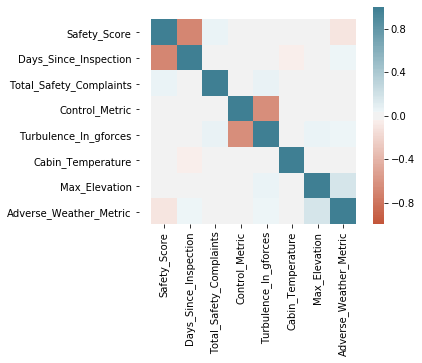

In [35]:
corr = train_df[num_col].corr()

sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

plt.xticks(rotation = 90)
plt.xlim(-0.5, 8)
plt.ylim(8, -0.5)
plt.show()

* There is a strong inverse correlation between Safety_Score and Days_Since_Inspection. This column will not be dropped

### Feature Importances

In [37]:
X = train_df[cat_col + num_col+ synth_cols]
y= train_df[target_col]

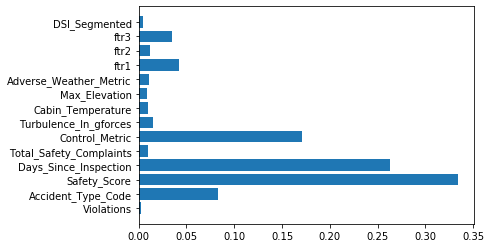

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dt = DecisionTreeClassifier()
#x_train,x_test,y_train,y_test = train_test_split(X,y, random_state = 111)

dt.fit(X,y)
dt.feature_importances_

plt.figure()
plt.barh(X.columns, dt.feature_importances_)
plt.show()

### Saving current dataframe

In [41]:
train_df.to_csv(r'train_mod.csv', index = None, header=True)
test_df.to_csv(r'test_mod.csv', index = None, header=True)